# Using Neural Networks to Solve NLP Problems

## Parts-of-speech tagging (POS)

- Assign a category to a word according to its syntactic function.
    - noun, pronoun, adjective, determiner, verb, adverb, preposition, conjunction, interjection
- Data download link: https://www.clips.uantwerpen.be/conll2000/chunking/
- F1 score: 

$$ F1 = 2 \frac{precision * recall}{precision + recall} $$
$$ precision = \frac{TruePositives}{TruePositives + FalsePositives} $$
$$ recall = \frac{TruePositives}{TruePositives + FalseNegatives} $$

In [2]:
import os
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [32]:
def preprocess(dataset):
    dataset = dataset.drop('drop', axis=1)
    dataset['word'] = dataset['word'].apply(lambda x: x.lower())
    return dataset

In [33]:
trainData = preprocess(pd.read_csv('../large_files/chunking/train.txt', sep=' ', names=['word', 'tag', 'drop']))
testData = preprocess(pd.read_csv('../large_files/chunking/test.txt', sep=' ', names=['word', 'tag', 'drop']))

In [34]:
trainData.head()

,word,tag
0,confidence,NN
1,in,IN
2,the,DT
3,pound,NN
4,is,VBZ


In [39]:
vocabulary = trainData['word'].unique()

In [40]:
tags = trainData['tag'].unique()

In [41]:
tags

array(['NN', 'IN', 'DT', 'VBZ', 'RB', 'VBN', 'TO', 'VB', 'JJ', 'NNS',
       'NNP', ',', 'CC', 'POS', '.', 'VBP', 'VBG', 'PRP$', 'CD', '``',
       "''", 'VBD', 'EX', 'MD', '#', '(', '$', ')', 'NNPS', 'PRP', 'JJS',
       'WP', 'RBR', 'JJR', 'WDT', 'WRB', 'RBS', 'PDT', 'RP', ':', 'FW',
       'WP$', 'SYM', 'UH'], dtype=object)

### Logistic regression

- Does not capture sequence information: 
    - p(tag | word) = softmax(W[word_index])
- It just maps one single word to one tag. 
- Ambiguities are not treated by this model
    - A word having more than one possible tag
    - "Book a ship to france"
    - "Ship a book to france"
- Accuracy: > 90%

In [ ]:
class LogisticRegression:
    def __init__(self):
        pass
    
    def fit(self, X, Y, vocab_list, tag_list, epochs=10, batch_size=100):
        features = [
            tf.feature_column.categorical_column_with_vocabulary_list('word', vocabulary_list=vocab_list)
        ]
        self.model = tf.estimator.LinearClassifier(feature_columns=features, n_classes=len(tag_list), label_vocabulary=tag_list)
        input_func = tf.estimator.inputs.pandas_input_fn(x=X,y=Y,batch_size=batch_size,num_epochs=epochs,shuffle=True)
        self.model.train(input_func, steps=epochs*len(X)/batch_size)

    def evaluate(self, X, Y, batch_size=10):
        eval_input_func = tf.estimator.inputs.pandas_input_fn(
            x=X,
            y=Y,
            batch_size=batch_size,
            num_epochs=1,
            shuffle=False
        )
        results = self.model.evaluate(eval_input_func)
        return results

    def predict(self, words):
        pred_input_func = tf.estimator.inputs.pandas_input_fn(
              x=pd.DataFrame.from_dict({'word': words}),
              batch_size=100,
              num_epochs=1,
              shuffle=False
        )
        predictions = self.model.predict(pred_input_func)
        return list(predictions)        

In [87]:
model = LogisticRegression()
model.fit(X=trainData, Y=trainData['tag'], vocab_list=vocabulary.tolist(), tag_list=tags.tolist())

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_eval_distribute': None, '_num_worker_replicas': 1, '_model_dir': '/tmp/tmphd4s7hb3', '_is_chief': True, '_save_summary_steps': 100, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_service': None, '_evaluation_master': '', '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_experimental_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_train_distribute': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7a80638f28>, '_protocol': None, '_device_fn': None, '_log_step_count_steps': 100, '_task_id': 0, '_master': '', '_num_ps_replicas': 0}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

INFO:tensorflow:loss = 30.987915, step = 7101 (0.438 sec)
INFO:tensorflow:global_step/sec: 231.047
INFO:tensorflow:loss = 39.588947, step = 7201 (0.423 sec)
INFO:tensorflow:global_step/sec: 256.925
INFO:tensorflow:loss = 29.076149, step = 7301 (0.388 sec)
INFO:tensorflow:global_step/sec: 226.277
INFO:tensorflow:loss = 39.514095, step = 7401 (0.441 sec)
INFO:tensorflow:global_step/sec: 274.123
INFO:tensorflow:loss = 35.54767, step = 7501 (0.371 sec)
INFO:tensorflow:global_step/sec: 228.236
INFO:tensorflow:loss = 35.500275, step = 7601 (0.436 sec)
INFO:tensorflow:global_step/sec: 214.017
INFO:tensorflow:loss = 57.660866, step = 7701 (0.465 sec)
INFO:tensorflow:global_step/sec: 213.491
INFO:tensorflow:loss = 42.751644, step = 7801 (0.474 sec)
INFO:tensorflow:global_step/sec: 255.021
INFO:tensorflow:loss = 35.18807, step = 7901 (0.387 sec)
INFO:tensorflow:global_step/sec: 231.665
INFO:tensorflow:loss = 55.695854, step = 8001 (0.432 sec)
INFO:tensorflow:global_step/sec: 222.105
INFO:tensorf

INFO:tensorflow:global_step/sec: 226.124
INFO:tensorflow:loss = 20.012203, step = 15401 (0.441 sec)
INFO:tensorflow:global_step/sec: 199.853
INFO:tensorflow:loss = 35.40974, step = 15501 (0.497 sec)
INFO:tensorflow:global_step/sec: 226.678
INFO:tensorflow:loss = 41.794556, step = 15601 (0.441 sec)
INFO:tensorflow:global_step/sec: 227.052
INFO:tensorflow:loss = 37.339996, step = 15701 (0.440 sec)
INFO:tensorflow:global_step/sec: 272.925
INFO:tensorflow:loss = 18.189425, step = 15801 (0.367 sec)
INFO:tensorflow:global_step/sec: 263.724
INFO:tensorflow:loss = 33.17208, step = 15901 (0.380 sec)
INFO:tensorflow:global_step/sec: 183.913
INFO:tensorflow:loss = 35.617386, step = 16001 (0.546 sec)
INFO:tensorflow:global_step/sec: 178.552
INFO:tensorflow:loss = 33.488907, step = 16101 (0.565 sec)
INFO:tensorflow:global_step/sec: 190.908
INFO:tensorflow:loss = 32.82385, step = 16201 (0.517 sec)
INFO:tensorflow:global_step/sec: 227.49
INFO:tensorflow:loss = 21.339346, step = 16301 (0.447 sec)
INFO

In [89]:
model.evaluate(X=testData, Y=testData['tag'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-02-16:02:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphd4s7hb3/model.ckpt-21173
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-02-16:02:31
INFO:tensorflow:Saving dict for global step 21173: accuracy = 0.89351374, average_loss = 0.3801966, global_step = 21173, loss = 3.8017251
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 21173: /tmp/tmphd4s7hb3/model.ckpt-21173


{'accuracy': 0.89351374,
 'average_loss': 0.3801966,
 'global_step': 21173,
 'loss': 3.8017251}

In [106]:
words = ['car', 'book', 'house', 'run', 'ship', 'of', 'really']
predictions = model.predict(words)
dict(zip(
    words, 
    [ p['classes'][0].decode('utf-8') for p in predictions ]
))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphd4s7hb3/model.ckpt-21173
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'book': 'NN',
 'car': 'NN',
 'house': 'NNP',
 'of': 'IN',
 'really': 'RB',
 'run': 'VB',
 'ship': 'NN'}

### Recurrent neural networks

- Use sequences, use context
- Similar to logistic regression model, but with an output entering again to the RNN

$$ h(t) = \sigma(W_x^T x(t) + W_h^T h(t-1) + b) $$

- Modern RNNs:
    - LSTMs
    - GRUs

In [17]:
def get_data(path='../large_files', split_sequences=False):
    if not os.path.exists(path + '/chunking'):
        print("Please create a folder in your local directory called 'chunking'")
        print("train.txt and test.txt should be stored in there.")
        print("Please check the comments to get the download link.")
        exit()
    elif not os.path.exists(path + '/chunking/train.txt'):
        print("train.txt is not in chunking/train.txt")
        print("Please check the comments to get the download link.")
        exit()
    elif not os.path.exists(path + '/chunking/test.txt'):
        print("test.txt is not in chunking/test.txt")
        print("Please check the comments to get the download link.")
        exit()

    word2idx = {}
    tag2idx = {}
    word_idx = 1
    tag_idx = 1
    Xtrain = []
    Ytrain = []
    currentX = []
    currentY = []
    for line in open(path + '/chunking/train.txt'):
        line = line.rstrip()
        if line:
            r = line.lower().split()
            word, tag, _ = r
            if word not in word2idx:
                word2idx[word] = word_idx
                word_idx += 1
            currentX.append(word2idx[word])
            
            if tag not in tag2idx:
                tag2idx[tag] = tag_idx
                tag_idx += 1
            currentY.append(tag2idx[tag])
        elif split_sequences:
            Xtrain.append(currentX)
            Ytrain.append(currentY)
            currentX = []
            currentY = []

    if not split_sequences:
        Xtrain = currentX
        Ytrain = currentY

    # load and score test data
    Xtest = []
    Ytest = []
    currentX = []
    currentY = []
    unknownIdx = word_idx
    for line in open(path + '/chunking/test.txt'):
        line = line.rstrip()
        if line:
            r = line.lower().split()
            word, tag, _ = r
            if word in word2idx:
                currentX.append(word2idx[word])
            else:
                currentX.append(unknownIdx) # use this as unknown
            currentY.append(tag2idx[tag])
        elif split_sequences:
            Xtest.append(currentX)
            Ytest.append(currentY)
            currentX = []
            currentY = []
    if not split_sequences:
        Xtest = currentX
        Ytest = currentY

    return Xtrain, Ytrain, Xtest, Ytest, word2idx, tag2idx, unknownIdx

def flatten(l):
    return [item for sublist in l for item in sublist]

In [18]:
Xtrain, Ytrain, Xtest, Ytest, word2idx, tag2idx, unknownIdx = get_data(split_sequences=True)

In [19]:
V = len(word2idx) + 2
K = len(set(flatten(Ytrain)) | set(flatten(Ytest))) + 1

In [20]:
class RecurrentNeuralNetwork:
    def __init__(self):
        pass
    
    def fit(self, sentences, tags, vocab_size, num_tags, hidden_layer_size=10, embedding_dim=10, batch_size=32, epochs=10, lr=1e-2):
        self.sequence_length = max(len(x) for x in sentences)
        tf.reset_default_graph()
        
        self.inputs = tf.placeholder(tf.int32, shape=[None, self.sequence_length])
        self.targets = tf.placeholder(tf.int32, shape=[None, self.sequence_length])
        
        We = tf.Variable(np.random.randn(vocab_size, embedding_dim).astype(np.float32))
        Wo = tf.Variable(np.random.randn(hidden_layer_size, num_tags).astype(np.float32))
        bo = tf.Variable(np.random.randn(num_tags).astype(np.float32))
        x = tf.nn.embedding_lookup(We, self.inputs) # batch_size x sequence_length x embedding_dim
        x = tf.unstack(x, self.sequence_length, 1)  # sequence_length x batch_size x embedding_dim
        
        rnn_unit = tf.contrib.rnn.LSTMCell(hidden_layer_size, activation=tf.nn.relu, dtype=tf.float32)
        outputs, _ = tf.contrib.rnn.static_rnn(rnn_unit, x, dtype=tf.float32) # sequence_length x batch_size x hidden_layer_size
        outputs = tf.transpose(outputs, (1, 0, 2)) # batch_size x sequence_length x hidden_layer_size
        outputs = tf.reshape(outputs, (self.sequence_length * batch_size, hidden_layer_size)) # NT x hidden_layer_size
        
        logits = tf.matmul(outputs, Wo) + bo # NT x K
        predictions = tf.argmax(logits, 1)
        self.predict_op = tf.reshape(predictions, (batch_size, self.sequence_length))
        labels_flat = tf.reshape(self.targets, [-1])
        
        cost_op = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(
                logits=tf.reduce_max(logits, 1),
                labels=labels_flat, 
            )
        )
        optimizer = tf.train.AdamOptimizer(learning_rate=lr)
        train_op = optimizer.minimize(cost_op)
        init = tf.global_variables_initializer()
        
        t0 = time.time()
        padSents = tf.keras.preprocessing.sequence.pad_sequences(sentences, maxlen=self.sequence_length)
        padTags = tf.keras.preprocessing.sequence.pad_sequences(tags, maxlen=self.sequence_length)
        self.sess = tf.InteractiveSession()
        self.sess.run(init)
        costs = []
        for epoch in range(epochs):
            print("Starting epoch {} of {}".format(epoch, epochs))
            # padSents, padTags = shuffle(padSents, padTags)
            for b in range(len(padSents) // batch_size):
                start = b*batch_size
                end = (b+1)*batch_size
                _, cost = self.sess.run([train_op, cost_op], feed_dict={
                    self.inputs: padSents[start:end],
                    self.targets: padTags[start:end]
                })
                costs.append(cost)
        t1 = time.time()
        print("Training time: " + str(t1 - t0))
        plt.plot(costs)
        
    def predict(self, sentences):
        padSentences = tf.keras.preprocessing.sequence.pad_sequences(sentences, maxlen=self.sequence_length)
        return self.sess.run(self.predict_op, feed_dict={inputs: padSentences})     

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Starting epoch 0 of 2
Starting epoch 1 of 2
Training time: 13.128221988677979


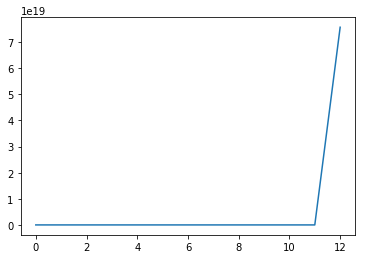

In [21]:
rnnModel = RecurrentNeuralNetwork()
rnnModel.fit(Xtrain, Ytrain, V, K, epochs=2)

In [22]:
Xtest  = tf.keras.preprocessing.sequence.pad_sequences(Xtest,  maxlen=rnnModel.sequence_length)
Ytest  = tf.keras.preprocessing.sequence.pad_sequences(Ytest,  maxlen=rnnModel.sequence_length)
# get test acc. too
p = rnnModel.sess.run(rnnModel.predict_op, feed_dict={rnnModel.inputs: Xtest, rnnModel.targets: Ytest})
n_test_correct = 0
n_test_total = 0
for yi, pi in zip(Ytest, p):
    yii = yi[yi > 0]
    pii = pi[yi > 0]
    n_test_correct += np.sum(yii == pii)
    n_test_total += len(yii)
test_acc = float(n_test_correct) / n_test_total

print(
    "train acc:", "%.4f" % (float(n_test_correct)/n_test_total),
    "test acc:", "%.4f" % test_acc
)

InvalidArgumentError: Input to reshape is a tensor with 1569360 values, but the requested shape has 24960
	 [[node Reshape (defined at <ipython-input-20-56ad4feddb58>:21)  = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](transpose, Reshape/shape)]]

Caused by op 'Reshape', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-1b5cdd9ba8b6>", line 2, in <module>
    rnnModel.fit(Xtrain, Ytrain, V, K, epochs=2)
  File "<ipython-input-20-56ad4feddb58>", line 21, in fit
    outputs = tf.reshape(outputs, (self.sequence_length * batch_size, hidden_layer_size)) # NT x hidden_layer_size
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 6482, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 1569360 values, but the requested shape has 24960
	 [[node Reshape (defined at <ipython-input-20-56ad4feddb58>:21)  = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](transpose, Reshape/shape)]]


### Hidden Markov Models

- Hidden Markov Model is an unsupervised model that aims to maximize the probability of whatever given data. 
  - Observation: $x = \{x_1, ..., x_t, ..., x_T\}$
  - Maximize: $p(x)$ 

- There are some latent variables that cause the observations, but they are hidden. Hidden States.
    - Hidden States are not required to be known or represent something
    - If hidden states are known, it's all a problem of counting p(A | B) = # (A && B) /  # (B)
    - If not, use expectation-maximization technique. 

- Viterbi algorithm
    - Reverses the direction of the problem
    - Causality: hidden state *causes* the observation
    - Viterbi: given a sequence of observation, what is the most likely sequence of hidden states?
    - Input: $\{x_1, ..., x_T\}$
    - Output: $\{z_1, ..., z_T\}$

- Part-of-speech tagging
    - Observations = words
    - Hidden states = tags

- Probability for Hidden States: P(tag(t) | tag(t-1)) is given by the grammar rules of the language
- Probability for Observations: P(word(t) | tag(t). 
- Viterbi algorithm uses these two probabilities to run the model.

In [6]:
sys.path.append(os.path.abspath('../vendor/machine_learning_examples/'))
from hmm_class.hmmd_scaled import HMM

from sklearn.metrics import f1_score

In [15]:
def accuracy(T, Y):
    n_correct = 0;
    n_total = 0;
    for t, y in zip(T, Y):
        n_correct += np.sum(t == y)
        n_total += len(y)
    return float(n_correct) / n_total

def total_f1_score(T, Y):
    T = np.concatenate(T)
    Y = np.concatenate(Y)
    return f1_score(T, Y, average=None).mean()

In [10]:
Xtrain, Ytrain, Xtest, Ytest, word2idx, tag2idx, unknownIdx = get_data(split_sequences=True)

In [11]:
smoothing = 10e-2
V = len(word2idx) + 2
M = max(max(y) for y in Ytrain) + 1 # number of hidden states
A = np.ones((M, M)) * smoothing # P (tag | tag+1)
pi = np.zeros(M)                 # P (tag)
for y in Ytrain:
    pi[y[0]] += 1
    for i in range(len(y) - 1):
        A[y[i], y[i+1]] += 1
A /= A.sum(axis=1, keepdims=True)
pi /= pi.sum()

B = np.ones((M, V)) * smoothing # P (word | tag)
for x, y in zip(Xtrain, Ytrain):
    for xi, yi in zip(x, y):
        B[yi, xi] += 1
B /= B.sum(axis=1, keepdims=True)

In [12]:
hmm = HMM(M)
hmm.pi = pi
hmm.A = A
hmm.B = B

Ptrain = []
for x in Xtrain:
    p = hmm.get_state_sequence(x)
    Ptrain.append(p)

Ptest = []
for x in Xtest:
    p = hmm.get_state_sequence(x)
    Ptest.append(p)

In [16]:
print("train accuracy: ", accuracy(Ytrain, Ptrain))
print("test accuracy: ", accuracy(Ytest, Ptest))
print("train f1 score: ", total_f1_score(Ytrain, Ptrain))
print("test f1 score: ", total_f1_score(Ytest, Ptest))

train accuracy:  0.9634104294681358
test accuracy:  0.9179981847732022
train f1 score:  0.9032321066180082
test f1 score:  0.8398427947445825


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
%run -i '../vendor/machine_learning_examples/nlp_class2/pos_hmm.py'

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


train accuracy: 0.9737539378539345
test accuracy: 0.9287840091183486
train f1: 0.9235279546052866
test f1: 0.862609207175332
